In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

data = pd.read_csv("../input/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


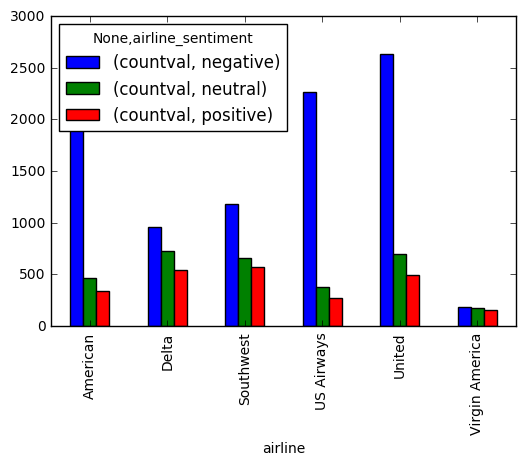

In [16]:
# Check the ratio of positive and negative tweets for each airline
data['countval'] = 1
groupby_object = data[['airline','airline_sentiment','countval']] \
                 .groupby(['airline','airline_sentiment']).aggregate(sum)
groupby_object.unstack(level=1).plot(kind='bar')
plt.show()

In [21]:
from nltk.corpus import stopwords
import re

def tweet_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = raw_review
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

processed_tweets = []
for tweet in data['text']:
    processed = tweet_to_words(tweet)
    processed_tweets.append(processed)
    
print(processed_tweets)

['virginamerica dhepburn said', 'virginamerica plus added commercials experience tacky', 'virginamerica today must mean need take another trip', 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse', 'virginamerica really big bad thing', 'virginamerica seriously would pay flight seats playing really bad thing flying va', 'virginamerica yes nearly every time fly vx ear worm go away', 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp', 'virginamerica well', 'virginamerica amazing arrived hour early good', 'virginamerica know suicide second leading cause death among teens', 'virginamerica lt pretty graphics much better minimal iconography', 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p', 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn', 'virginamerica thanks', 'virginamerica sfo pdx schedule still mia', 'virg